In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Cricket = pd.read_csv('Cricket Sound.csv')

In [2]:
( 51 + 9 ) / 2

30.0

In [4]:
Cricket.head()

,Date,Time,Chirps_15s,Temp_C
0,21-Aug,2030,44.0,26.944
1,21-Aug,2100,46.4,25.833
2,21-Aug,2200,43.6,25.556
3,24-Aug,1945,35.0,23.056
4,24-Aug,2015,35.0,21.389


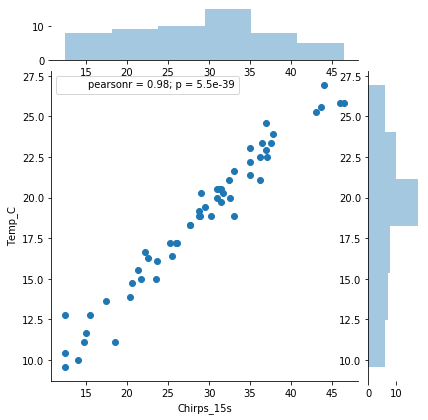

In [5]:
sns.jointplot(x='Chirps_15s', y = 'Temp_C', data = Cricket, kind = 'scatter')

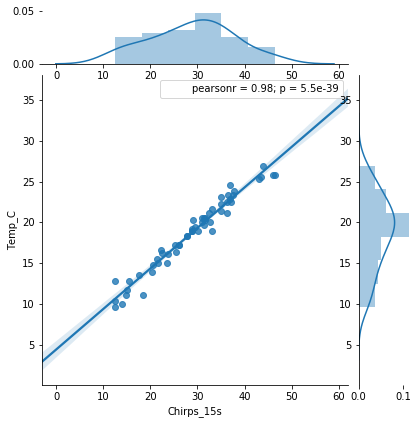

In [6]:
sns.jointplot(x='Chirps_15s', y = 'Temp_C', data = Cricket, kind = 'reg')

In [7]:
# y = mx + b

# m = Slope (Gredient)
# b = y-intercept (Bais)

In [3]:
dict_1 = {'Match_number' : [1,2,3,4,5], 'Runs' : [4, 15, 32, 45, 85]}

Match = pd.DataFrame(dict_1)
Match

,Match_number,Runs
0,1,4
1,2,15
2,3,32
3,4,45
4,5,85


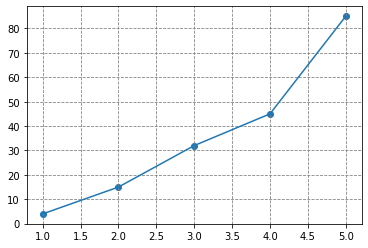

In [5]:
plt.scatter(Match['Match_number'], Match['Runs'])
plt.plot(Match['Match_number'], Match['Runs'])
plt.grid(color = 'gray', linestyle = 'dashed')

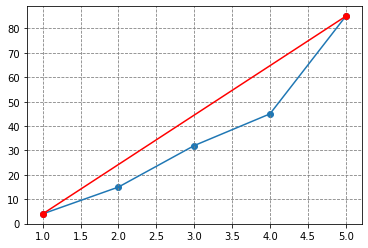

In [6]:
plt.scatter(Match['Match_number'], Match['Runs'])
plt.plot(Match['Match_number'], Match['Runs'])
plt.grid(color = 'gray', linestyle = 'dashed')
plt.plot([1,5], [4,85], 'ro-')


In [8]:
## y = mx + b

x = Match['Match_number']
y = Match['Runs']

# m = (y2 - y1) / (x2 - x1)

m = (85 - 4) / (5 - 1)

print('Slope or Gredient (m) is : ', m)



# # IF we extend (1,4) in lower direction then it will cross y axis.
# # lets assume the point of crossing y axis is (x,y)

# m = (4 - y) / (1 - x)
# => 20.25 = (4-y) / (1-x)
# => y = -20.25 + 20.25x + 4
# => y = 20.25x - 16.25
# => y = 20.25x + (-16.25)

b = -16.25


print('y-intercept or bais (b) is : ', b)

print('Final equation of staight line : y = 20.25x + (-16.25)')

Slope or Gredient (m) is :  20.25
y-intercept or bais (b) is :  -16.25
Final equation of staight line : y = 20.25x + (-16.25)


In [49]:
20.25 * 2 + (-16.25)

24.25

In [9]:
Match['Runs_by_straight_line'] = Match['Match_number'].apply(lambda x : m*x + b)
Match

,Match_number,Runs,Runs_by_straight_line
0,1,4,4.00
1,2,15,24.25
2,3,32,44.50
3,4,45,64.75
4,5,85,85.00


In [14]:
(Match['Runs'] - Match['Runs_by_straight_line']).apply(lambda a : a**2).sum() / 5

126.375

In [52]:
from sklearn import metrics
metrics.r2_score(Match['Runs'], Match['Runs_by_straight_line'])

0.8405483496517614

In [15]:
# loss Function


# Finding m

#  Sum of all [ (x - xMean) * (y - yMean) ] / Sum of all [ (x - xMean)**2 ]
    
    
m = sum((x - x.mean()) * (y - y.mean())) / sum((x - x.mean())**2)

print('Slope or Gredient (m) by Loss Function is : ', m)

# Finding b

# b = yMean - m * xMean

b = round((y.mean() - m * x.mean()), 1)


print('y-intercept or bais (b) by Loss Function is : ', b)

print('Final equation of staight line : y = 19.2x + (-21.4)')

Slope or Gredient (m) by Loss Function is :  19.2
y-intercept or bais (b) by Loss Function is :  -21.4
Final equation of staight line : y = 19.2x + (-21.4)


In [16]:
Match['Runs_by_Loss_function'] = Match['Match_number'].apply(lambda x : m*x + b)
Match

,Match_number,Runs,Runs_by_straight_line,Runs_by_Loss_function
0,1,4,4.00,-2.2
1,2,15,24.25,17.0
2,3,32,44.50,36.2
3,4,45,64.75,55.4
4,5,85,85.00,74.6


In [18]:
(Match['Runs'] - Match['Runs_by_Loss_function']).apply(lambda a : a**2).sum() / 5

55.28000000000001

In [69]:
metrics.r2_score(Match['Runs'], Match['Runs_by_Loss_function'])

0.930251337438175

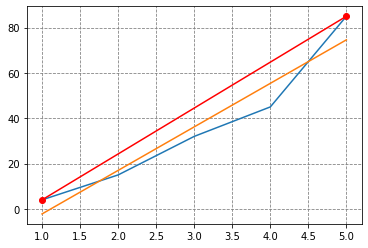

In [71]:
plt.plot(Match['Match_number'], Match['Runs'])
plt.grid(color = 'gray', linestyle = 'dashed')
plt.plot([1,5], [4,85], 'ro-')
plt.plot(Match['Match_number'], Match['Runs_by_Loss_function'])

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(np.array(x).reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.predict(np.array(x).reshape(-1,1))

array([-2.2, 17. , 36.2, 55.4, 74.6])

In [79]:
np.array(y)

array([ 4, 15, 32, 45, 85], dtype=int64)

In [80]:
Match

,Match_number,Runs,Runs_by_straight_line,Runs_by_Loss_function
0,1,4,4.00,-2.2
1,2,15,24.25,17.0
2,3,32,44.50,36.2
3,4,45,64.75,55.4
4,5,85,85.00,74.6


In [21]:
lm.coef_

array([19.2])

In [22]:
lm.intercept_

-21.400000000000006